学习R语言PCA。

# 测试PCA

In [1]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [2]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [6]:
corr <- cor(iris[, -5])
corr

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


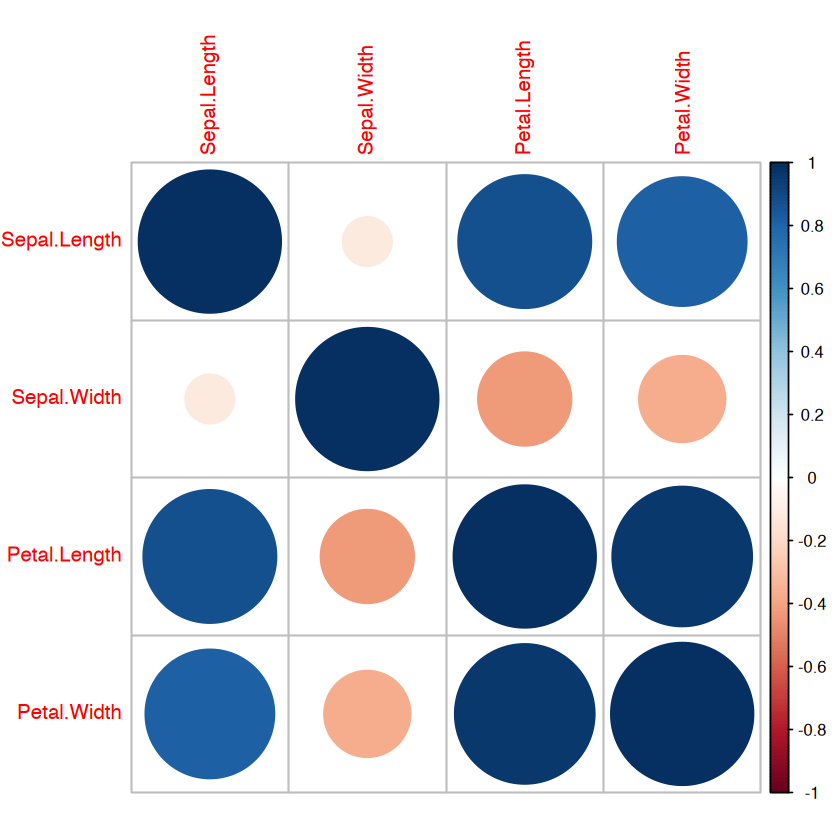

In [9]:
library(corrplot)
corrplot(corr)

In [11]:
pca_res <- prcomp(
  iris[, -5],
  center = TRUE,
  scale = TRUE
)

pca_res

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

In [12]:
summary(pca_res)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

In [ ]:
library(tidyverse)
pca_res$x %>% head()

PC1,PC2,PC3,PC4
-2.257141,-0.4784238,0.12727962,0.024087508
-2.074013,0.6718827,0.23382552,0.102662845
-2.356335,0.3407664,-0.04405390,0.028282305
-2.291707,0.5953999,-0.09098530,-0.065735340
-2.381863,-0.6446757,-0.01568565,-0.035802870
-2.068701,-1.4842053,-0.02687825,0.006586116


In [17]:
pca_res$center

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333

In [18]:
pca_res$scale

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.8280661    0.4358663    1.7652982    0.7622377

In [19]:
pca_res$sdev

[1] 1.7083611 0.9560494 0.3830886 0.1439265

In [20]:
pca_res$rotation

,PC1,PC2,PC3,PC4
Sepal.Length,0.5210659,-0.37741762,0.7195664,0.2612863
Sepal.Width,-0.2693474,-0.92329566,-0.2443818,-0.1235096
Petal.Length,0.5804131,-0.02449161,-0.1421264,-0.8014492
Petal.Width,0.5648565,-0.06694199,-0.6342727,0.5235971


In [27]:
iris_scaled <- scale(iris[, -5])

# 手动计算预测
iris_scaled %*% pca_res$rotation %>% head()

PC1,PC2,PC3,PC4
-2.257141,-0.4784238,0.12727962,0.024087508
-2.074013,0.6718827,0.23382552,0.102662845
-2.356335,0.3407664,-0.04405390,0.028282305
-2.291707,0.5953999,-0.09098530,-0.065735340
-2.381863,-0.6446757,-0.01568565,-0.035802870
-2.068701,-1.4842053,-0.02687825,0.006586116


# 结果可视化

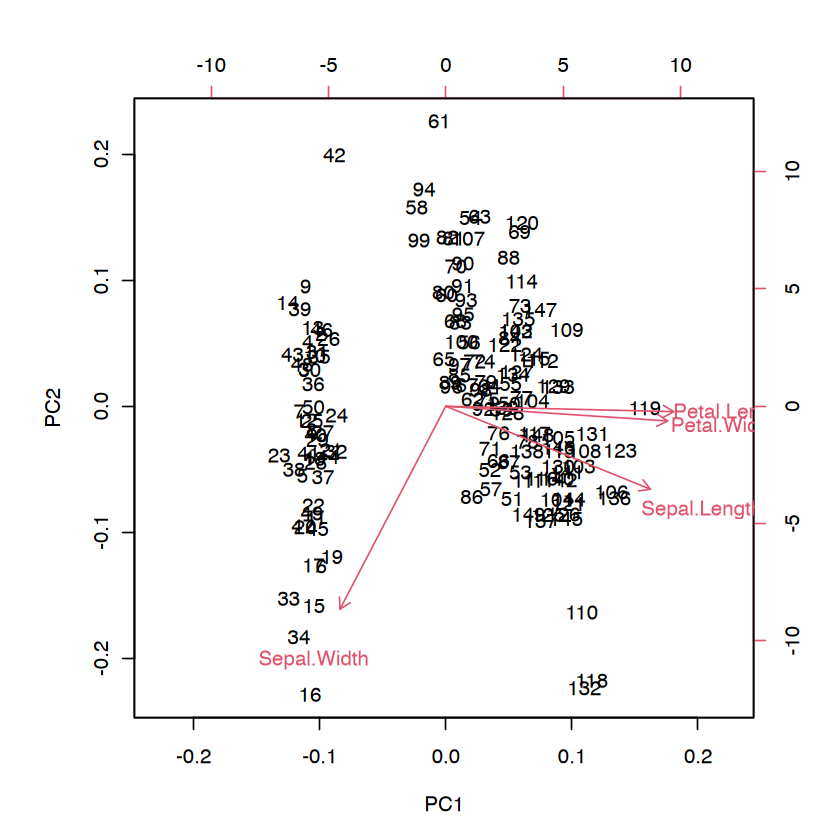

In [28]:
biplot(pca_res)

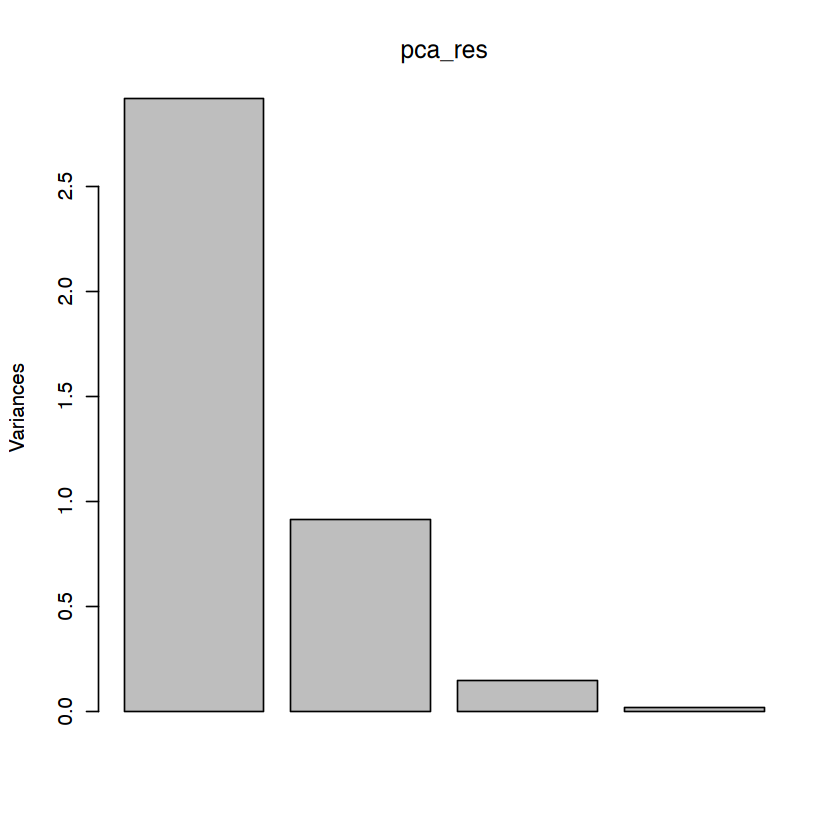

In [29]:
screeplot(pca_res)

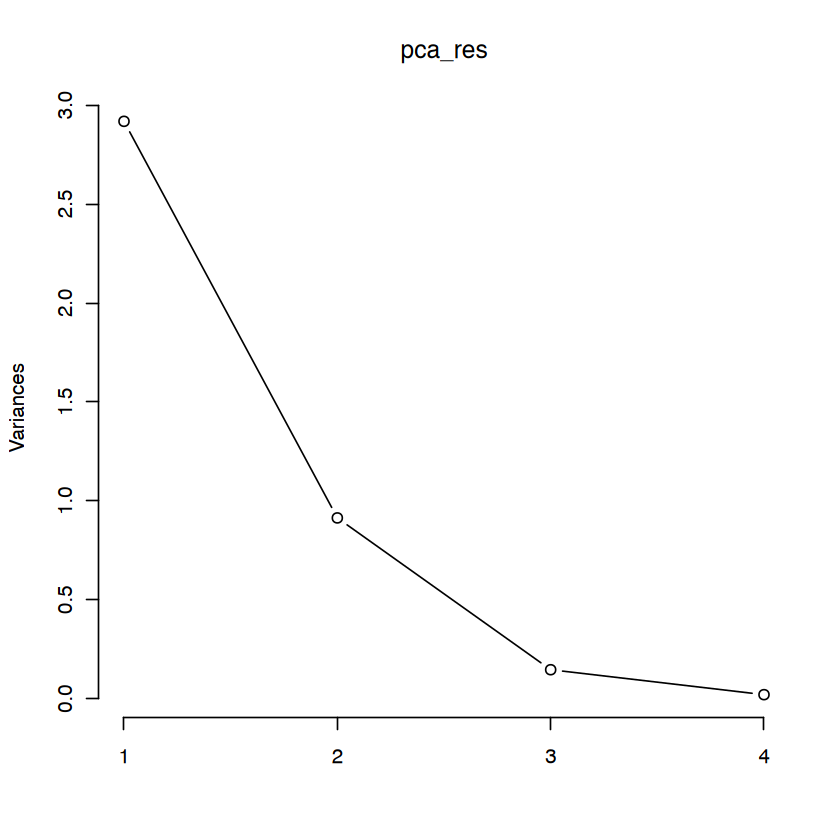

In [30]:
screeplot(pca_res, type = "lines")

# factoextra

## 进行PCA分析

In [33]:
library(factoextra)

In [34]:
library(FactoMineR)

In [ ]:
pca_res <- PCA(
  iris[, -5],
  scale.unit = TRUE,
  graph = TRUE
)

In [37]:
pca_res

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 150 individuals, described by 4 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

In [40]:
summary(pca_res) %>% print()


Call:
PCA(X = iris[, -5], scale.unit = TRUE, graph = TRUE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4
Variance               2.918   0.914   0.147   0.021
% of var.             72.962  22.851   3.669   0.518
Cumulative % of var.  72.962  95.813  99.482 100.000

Individuals (the 10 first)
                 Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3
1            |  2.319 | -2.265  1.172  0.954 |  0.480  0.168  0.043 | -0.128
2            |  2.202 | -2.081  0.989  0.893 | -0.674  0.331  0.094 | -0.235
3            |  2.389 | -2.364  1.277  0.979 | -0.342  0.085  0.020 |  0.044
4            |  2.378 | -2.299  1.208  0.935 | -0.597  0.260  0.063 |  0.091
5            |  2.476 | -2.390  1.305  0.932 |  0.647  0.305  0.068 |  0.016
6            |  2.555 | -2.076  0.984  0.660 |  1.489  1.617  0.340 |  0.027
7            |  2.468 | -2.444  1.364  0.981 |  0.048  0.002  0.000 |  0.335
8            |  2.246 | -2.233  1.139  0.988 |  0.223  0.036  0.010 |

## PCA可视化

In [38]:
get_eigenvalue(pca_res)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.91849782,72.9624454,72.96245
Dim.2,0.91403047,22.8507618,95.81321
Dim.3,0.14675688,3.6689219,99.48213
Dim.4,0.02071484,0.5178709,100.00000


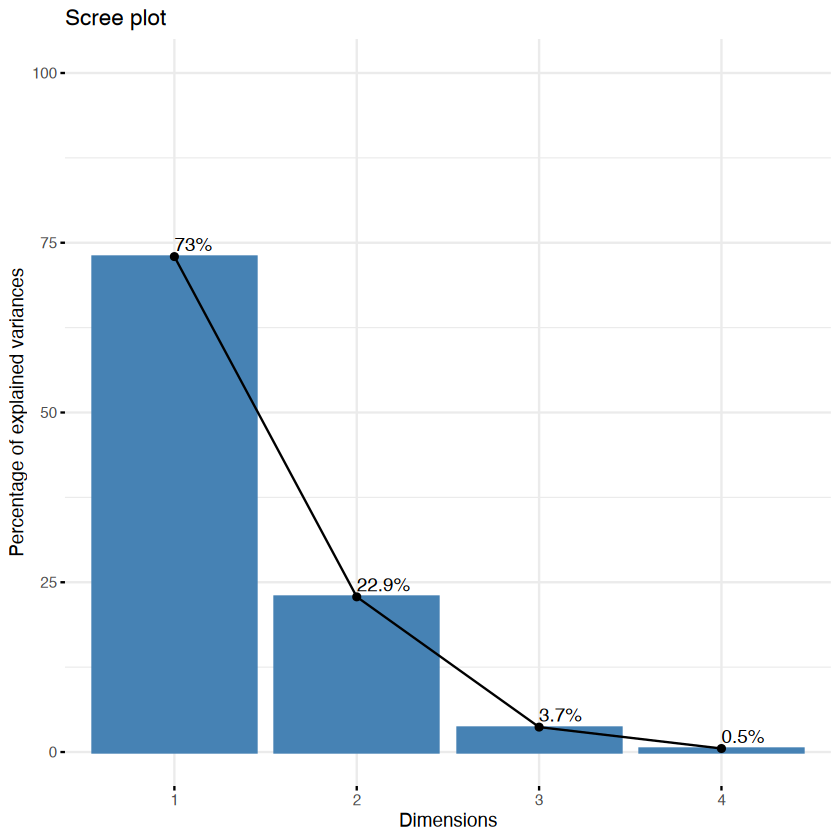

In [42]:
fviz_eig(pca_res, addlabels = TRUE, ylim = c(0, 100))

## 提取变量结果

In [43]:
res_var <- get_pca_var(pca_res)

In [44]:
res_var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [45]:
res_var$cor

,Dim.1,Dim.2,Dim.3,Dim.4
Sepal.Length,0.8901688,0.36082989,-0.27565767,-0.03760602
Sepal.Width,-0.4601427,0.88271627,0.09361987,0.01777631
Petal.Length,0.9915552,0.02341519,0.05444699,0.11534978
Petal.Width,0.9649790,0.06399985,0.24298265,-0.07535950


In [46]:
res_var$contrib

,Dim.1,Dim.2,Dim.3,Dim.4
Sepal.Length,27.150969,14.24440565,51.777574,6.827052
Sepal.Width,7.254804,85.24748749,5.972245,1.525463
Petal.Length,33.687936,0.05998389,2.019990,64.232089
Petal.Width,31.906291,0.44812296,40.230191,27.415396


In [47]:
res_var$coord

,Dim.1,Dim.2,Dim.3,Dim.4
Sepal.Length,0.8901688,0.36082989,-0.27565767,-0.03760602
Sepal.Width,-0.4601427,0.88271627,0.09361987,0.01777631
Petal.Length,0.9915552,0.02341519,0.05444699,0.11534978
Petal.Width,0.9649790,0.06399985,0.24298265,-0.07535950


In [48]:
res_var$cos2

,Dim.1,Dim.2,Dim.3,Dim.4
Sepal.Length,0.7924004,0.130198208,0.075987149,0.0014142127
Sepal.Width,0.2117313,0.779188012,0.008764681,0.0003159971
Petal.Length,0.9831817,0.000548271,0.002964475,0.0133055723
Petal.Width,0.9311844,0.004095980,0.059040571,0.0056790544


## 变量结果可视化

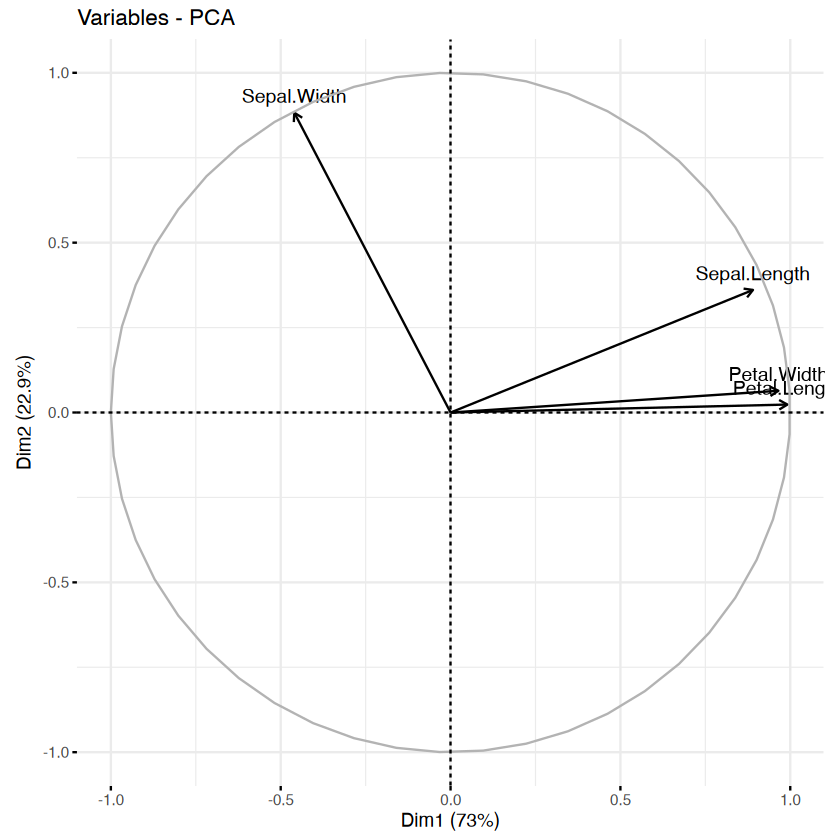

In [50]:
fviz_pca_var(pca_res)

### 变量和主成分的cos2可视化

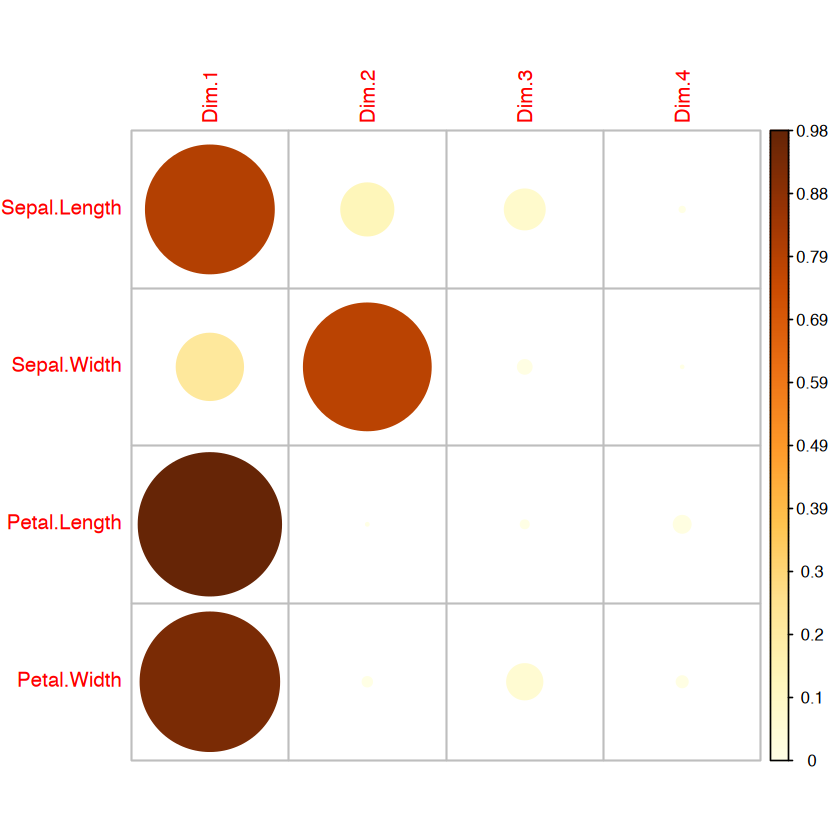

In [51]:
library("corrplot")
## corrplot 0.92 loaded
corrplot(res_var$cos2, is.corr = F)

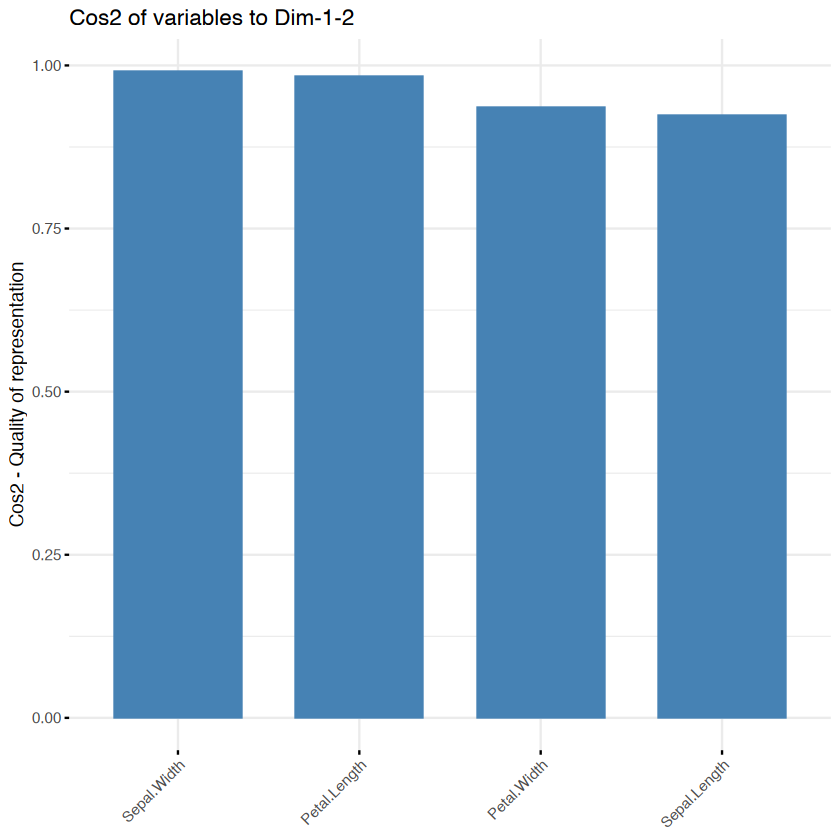

In [55]:
fviz_cos2(pca_res, choice = "var", axes = 1:2)

### 变量对主成分的贡献可视化

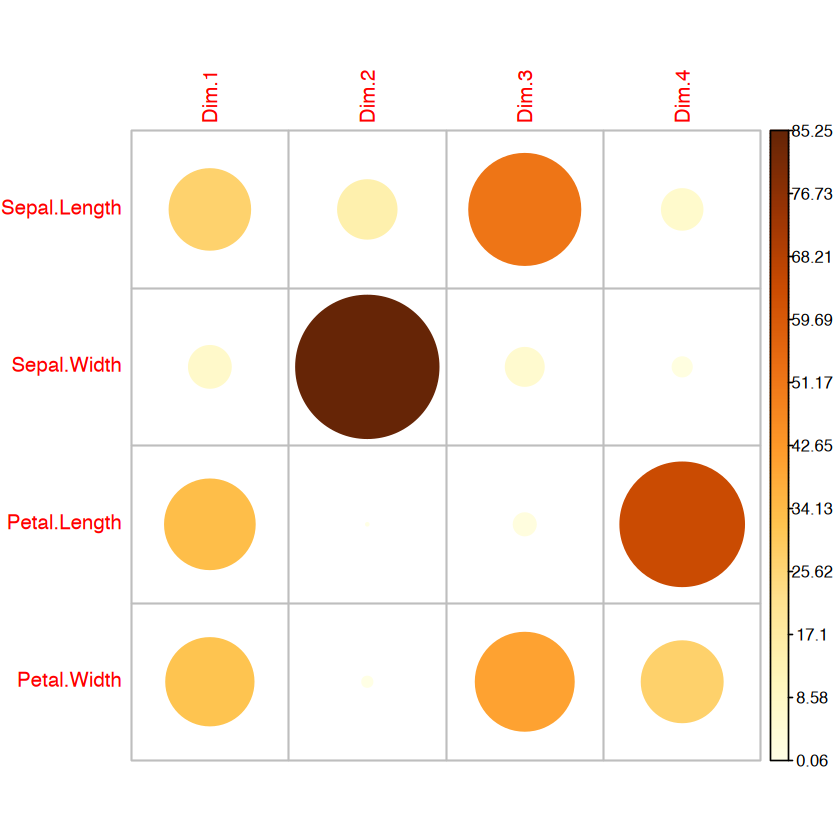

In [57]:
library("corrplot")
corrplot(res_var$contrib, is.corr = FALSE) 

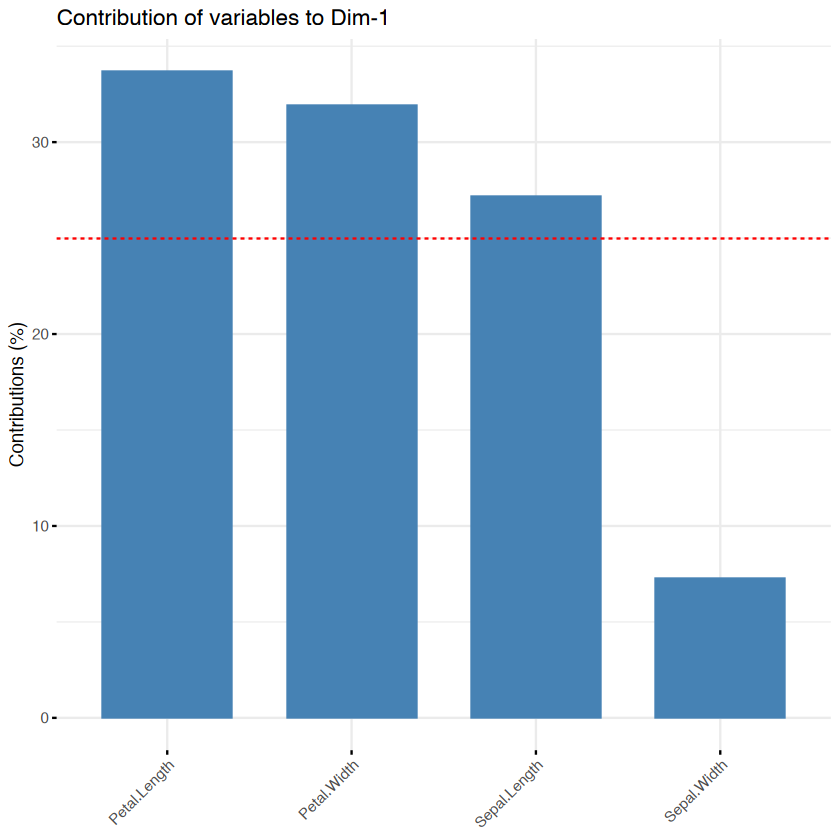

In [59]:
# 对第1主成分的贡献
fviz_contrib(pca_res, choice = "var", axes = 1)

## 维度描述

In [62]:
res_desc <- dimdesc(pca_res, axes = c(1, 2), proba = 0.05)
res_desc$Dim.1

,correlation,p.value
Petal.Length,0.9915552,3.369916e-133
Petal.Width,0.9649790,6.609632e-88
Sepal.Length,0.8901688,2.190813e-52
Sepal.Width,-0.4601427,3.139724e-09


## 提取样本结果

In [63]:
res_ind <- get_pca_ind(pca_res)

In [64]:
res_ind

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

In [67]:
res_ind$coord %>% head()

,Dim.1,Dim.2,Dim.3,Dim.4
1,-2.264703,0.4800266,-0.12770602,-0.02416820
2,-2.080961,-0.6741336,-0.23460885,-0.10300677
3,-2.364229,-0.3419080,0.04420148,-0.02837705
4,-2.299384,-0.5973945,0.09129011,0.06595556
5,-2.389842,0.6468354,0.01573820,0.03592281
6,-2.075631,1.4891775,0.02696829,-0.00660818


In [68]:
res_ind$contrib %>% head()

,Dim.1,Dim.2,Dim.3,Dim.4
1,1.1715796,0.16806554,0.074085470,0.018798188
2,0.9891845,0.33146674,0.250034006,0.341474919
3,1.2768164,0.08526419,0.008875320,0.025915633
4,1.2077372,0.26029781,0.037858004,0.140000650
5,1.3046313,0.30516562,0.001125175,0.041530572
6,0.9841236,1.61748779,0.003303827,0.001405371


In [70]:
res_ind$coord %>% head()

,Dim.1,Dim.2,Dim.3,Dim.4
1,-2.264703,0.4800266,-0.12770602,-0.02416820
2,-2.080961,-0.6741336,-0.23460885,-0.10300677
3,-2.364229,-0.3419080,0.04420148,-0.02837705
4,-2.299384,-0.5973945,0.09129011,0.06595556
5,-2.389842,0.6468354,0.01573820,0.03592281
6,-2.075631,1.4891775,0.02696829,-0.00660818


## 样本结果可视化

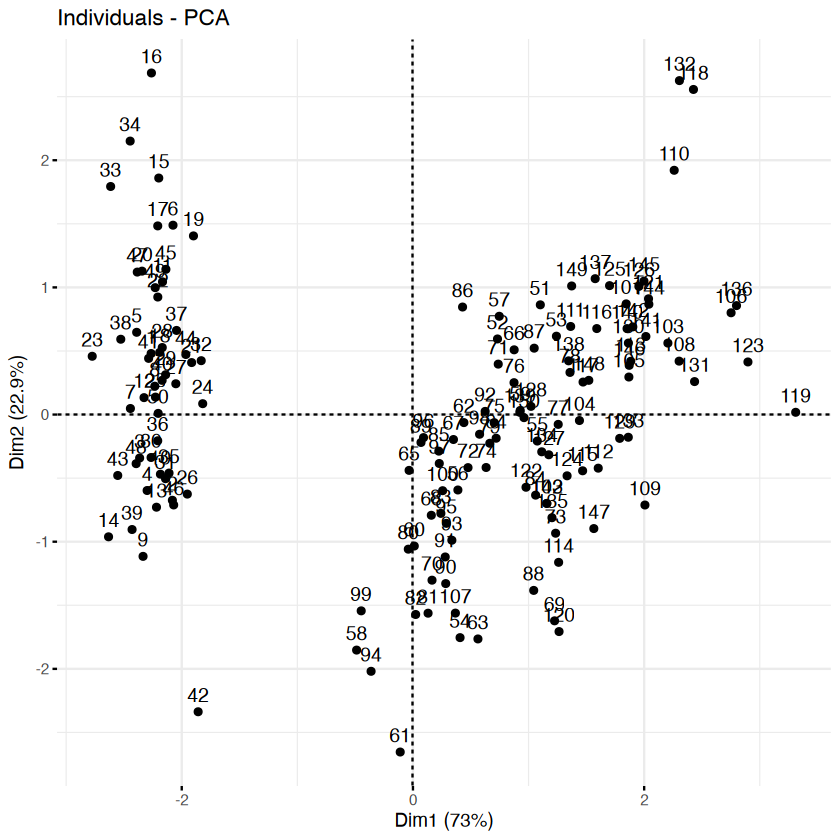

In [72]:
fviz_pca_ind(pca_res)

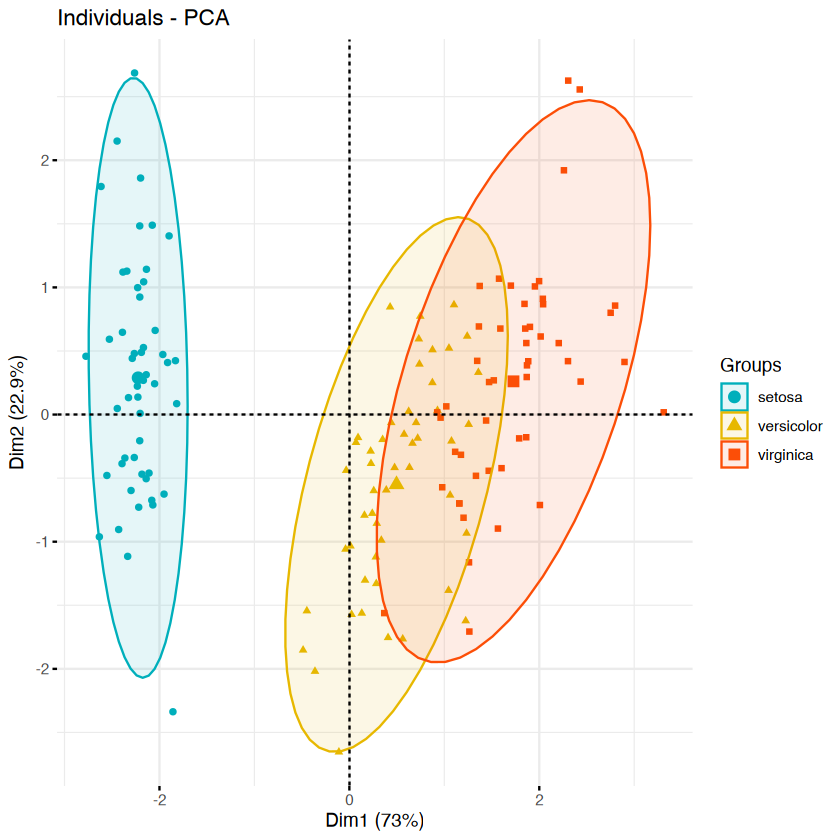

In [74]:
# 经典图形，是不是很熟悉？
fviz_pca_ind(
  pca_res,
  geom.ind = "point", # 只显示点，不要文字
  col.ind = iris$Species, # 按照组别上色
  palette = c("#00AFBB", "#E7B800", "#FC4E07"), # 自己提供颜色，或者使用主题
  addEllipses = TRUE, # 添加置信椭圆
  legend.title = "Groups"
)

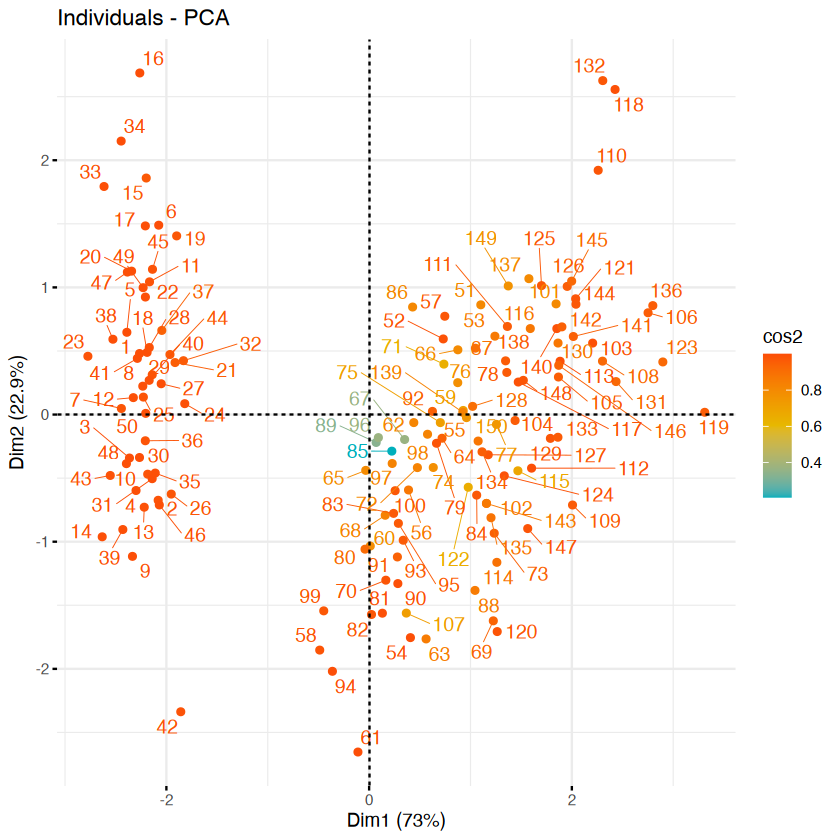

In [76]:
fviz_pca_ind(
  pca_res,
  col.ind = "cos2", # 按照cos2上色
  gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
  repel = TRUE
)

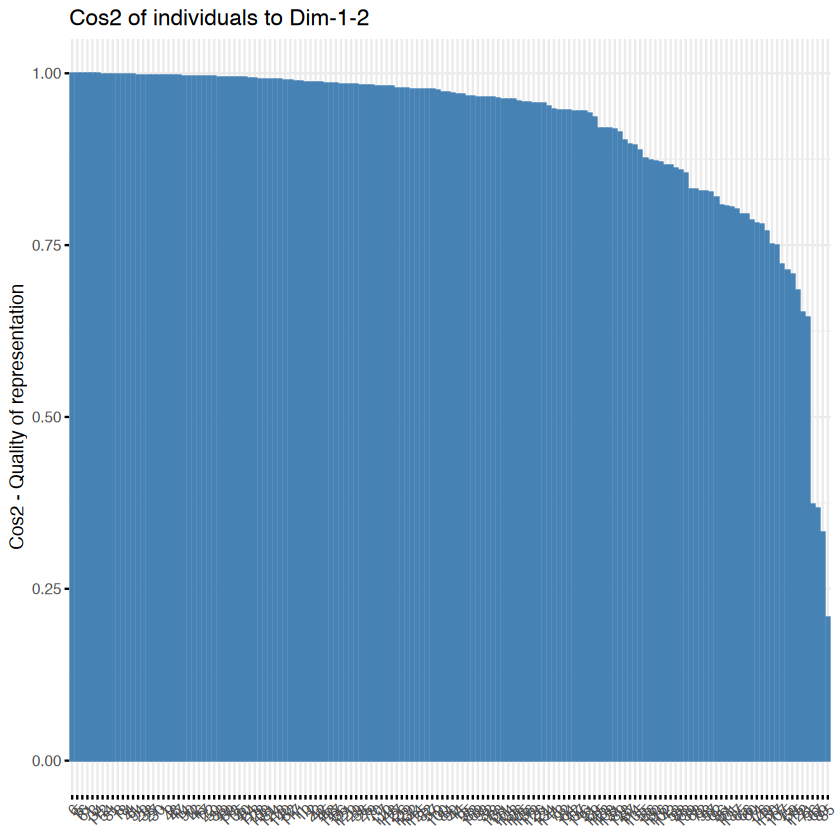

In [78]:
# axes选择主成分
fviz_cos2(pca_res, choice = "ind", axes = 1:2)

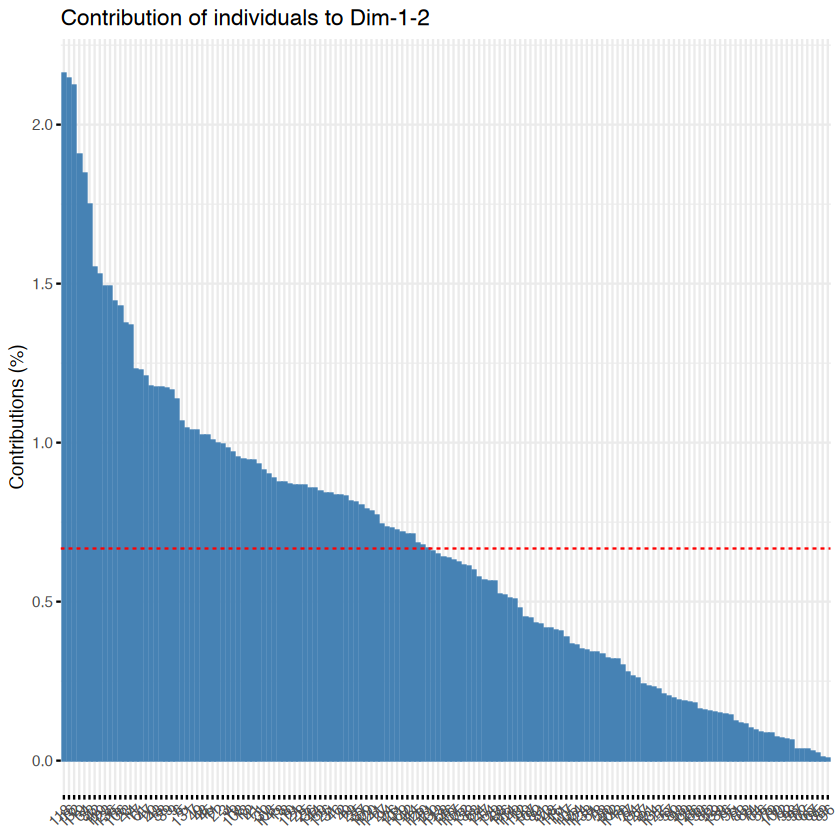

In [79]:
fviz_contrib(pca_res, choice = "ind", axes = 1:2)

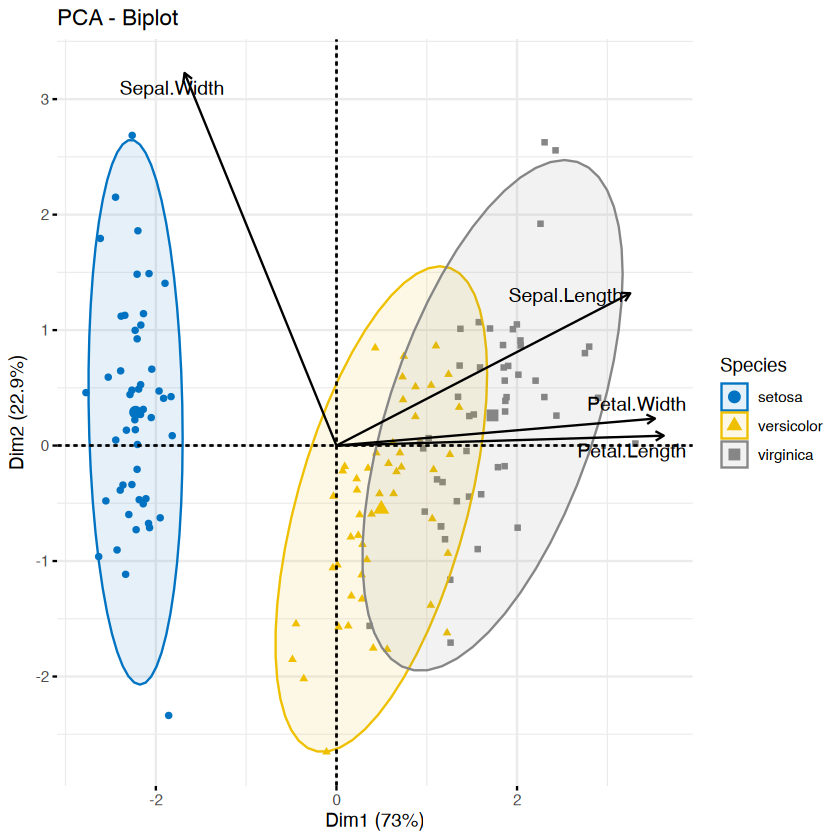

In [ ]:
# 同时有箭头和椭圆
fviz_pca_biplot(
  pca_res,
  col.ind = iris$Species,
  palette = "jco",
  addEllipses = TRUE,
  label = "var",
  col.var = "black",
  repel = TRUE,
  legend.title = "Species"
)